In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import keras
from sklearn.metrics import roc_auc_score

In [2]:
model = keras.Sequential([keras.layers.Dense(units=1, input_shape=[1])])
model.compile(optimizer='sgd', loss='mean_squared_error')

In [3]:
x = np.array([-1.0, 0.0, 1.0, 2.0, 3.0, 4.0])
y = np.array([-3.0, -1.0, 1.0, 3.0, 5.0, 7.0])

model.fit(x, y, epochs=300)

Epoch 1/300
1/1 [==============================] - 0s 400ms/step - loss: 13.4164
Epoch 2/300
1/1 [==============================] - 0s 8ms/step - loss: 10.7867
Epoch 3/300
1/1 [==============================] - 0s 0s/step - loss: 8.7130
Epoch 4/300
1/1 [==============================] - 0s 8ms/step - loss: 7.0769
Epoch 5/300
1/1 [==============================] - 0s 0s/step - loss: 5.7852
Epoch 6/300
1/1 [==============================] - 0s 8ms/step - loss: 4.7644
Epoch 7/300
1/1 [==============================] - 0s 8ms/step - loss: 3.9569
Epoch 8/300
1/1 [==============================] - 0s 8ms/step - loss: 3.3174
Epoch 9/300
1/1 [==============================] - 0s 0s/step - loss: 2.8100
Epoch 10/300
1/1 [==============================] - 0s 0s/step - loss: 2.4067
Epoch 11/300
1/1 [==============================] - 0s 8ms/step - loss: 2.0854
Epoch 12/300
1/1 [==============================] - 0s 8ms/step - loss: 1.8287
Epoch 13/300
1/1 [==============================] - 0s 8ms/st

In [4]:
model.predict([10.0])

1/1 [==============================] - 0s 290ms/step


array([[18.856396]], dtype=float32)

In [5]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_img, train_label), (test_img, test_label) = fashion_mnist.load_data()

In [6]:
train_label, test_label

(array([9, 0, 0, ..., 3, 0, 5], dtype=uint8),
 array([9, 2, 1, ..., 8, 1, 5], dtype=uint8))

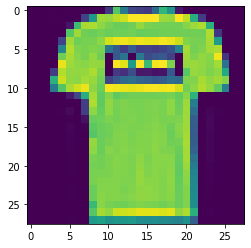

In [7]:
plt.imshow(train_img[1])

In [8]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [9]:
inputs = np.array([[1.0, 3.0, 4.0, 2.0]])
inputs = tf.convert_to_tensor(inputs)
print(f'input to softmax function: {inputs.numpy()}')

outputs = tf.keras.activations.softmax(inputs)
print(f'output of softmax function: {outputs.numpy()}')

sum = tf.reduce_sum(outputs)
print(f'sum of outputs: {sum}')

pred = np.argmax(outputs)
print(f'class with highest probability: {pred}')

input to softmax function: [[1. 3. 4. 2.]]
output of softmax function: [[0.0320586  0.23688282 0.64391426 0.08714432]]
sum of outputs: 1.0
class with highest probability: 2


In [10]:
model.compile(
    optimizer=tf.optimizers.Adam(),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(train_img, train_label, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 4.2162 - accuracy: 0.6813
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7371 - accuracy: 0.7153
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6344 - accuracy: 0.7443
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5904 - accuracy: 0.7733
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5260 - accuracy: 0.8127


In [11]:
model.evaluate(test_img, test_label)

313/313 [==============================] - 1s 2ms/step - loss: 0.5552 - accuracy: 0.8112


[0.5552379488945007, 0.8112000226974487]

In [14]:
train_img = train_img/255.0
test_img = test_img/255.0

# callback class 실행
callbacks = myCallback()

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
model.fit(train_img, train_label, epochs=5, callbacks=[callbacks])

Epoch 1/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.8850
Epoch 2/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.5493
Epoch 3/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4895
Epoch 4/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4566
Epoch 5/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4364


In [13]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_enc(self, epoch, logs={}):
        if(logs.get('loss')<0.4):
            print('\nLoss is low so cancelling training!')
            self.model.stop_training=True

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),      # (64, (3,3)): 64 filters size of 3*3
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),      # dense layer: connects input and output
    tf.keras.layers.Dense(10, activation='softmax')
])

In [15]:
model.summary()

# it is important to look at 'Output Shape' column
# 4th line, (None, 5, 5, 64): 64 images size of 5*5

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (32, 784)                 0         
                                                                 
 dense_3 (Dense)             (32, 512)                 401920    
                                                                 
 dense_4 (Dense)             (32, 10)                  5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [16]:
test_label[:100]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5, 7, 3, 4, 1, 2, 4, 8, 0, 2, 5,
       7, 9, 1, 4, 6, 0, 9, 3, 8, 8, 3, 3, 8, 0, 7, 5, 7, 9, 6, 1, 3, 7,
       6, 7, 2, 1, 2, 2, 4, 4, 5, 8, 2, 2, 8, 4, 8, 0, 7, 7, 8, 5, 1, 1,
       2, 3, 9, 8, 7, 0, 2, 6, 2, 3, 1, 2, 8, 4, 1, 8, 5, 9, 5, 0, 3, 2,
       0, 6, 5, 3, 6, 7, 1, 8, 0, 1, 4, 2], dtype=uint8)

1/1 [==============================] - 0s 13ms/step


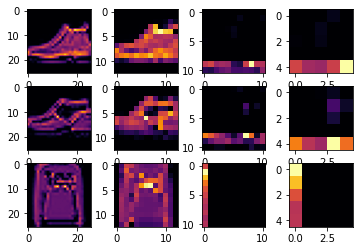

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras import models

f, axarr = plt.subplots(3,4)

first_img = 0
second_img = 23
third_img = 1
conv_num = 0

layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs=model.input, outputs=layer_outputs)

for x in range(0,4):
    f1 = activation_model.predict(test_img[first_img].reshape(1, 28, 28, 1))[x]
    axarr[0,x].imshow(f1[0, :, :, conv_num], cmap='inferno')
    axarr[0,x].grid(False)

    f2 = activation_model.predict(test_img[second_img].reshape(1, 28, 28, 1))[x]
    axarr[1,x].imshow(f2[0, :, :, conv_num], cmap='inferno')
    axarr[1,x].grid(False)

    f3 = activation_model.predict(test_img[third_img].reshape(1, 28, 28, 1))[x]
    axarr[2,x].imshow(f3[0, :, :, conv_num], cmap='inferno')
    axarr[2,x].grid(False)

In [17]:
from scipy import misc
ascent_img = misc.ascent()

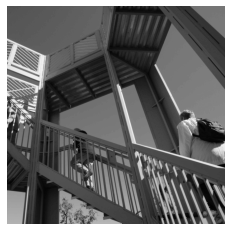

In [18]:
plt.grid(False)
plt.gray()
plt.axis('off')
plt.imshow(ascent_img)
plt.show()

In [19]:
import numpy as np

img_transformed = np.copy(ascent_img)

# get dimensions of img
size_x = img_transformed.shape[0]
size_y = img_transformed.shape[1]

filter = [[0, 1, 0], [1, -4, 1], [0, 1, 0]]
weight = 1

In [20]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [28]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [30]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 35, 35, 64)      

In [31]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
optimizer=RMSprop(lr=0.001),
metrics=['accuracy'])

c:\Users\hoon9\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


### 이수안 컴퓨터연구소 강의

#### datatype 정의

In [15]:
i = tf.constant(2)
print(i)

tf.Tensor(2, shape=(), dtype=int32)


In [16]:
f = tf.constant(2.)
print(f)

tf.Tensor(2.0, shape=(), dtype=float32)


In [17]:
f16 = tf.constant(2., dtype=tf.float16)
print(f16)

tf.Tensor(2.0, shape=(), dtype=float16)


In [18]:
# tf.cast: dtype 변환
f32 = tf.cast(f16, tf.float32)
print(f32)

tf.Tensor(2.0, shape=(), dtype=float32)


#### Dense layer
- fully connected layer(완전연결층)
- 노드 수(유닛 수), activation function 등 지정
- name을 통해 레이어간 구분 가능
- 가중치 초기화(kernel initializer)
    - 보통 가중치의 초기값으로 0에 가까운 무작위 값 사용

In [19]:
tf.keras.layers.Dense(10, activation='softmax', name='Dense Layer')

In [20]:
tf.keras.layers.Dense(10, kernel_initializer='he_normal', name='Dense Layer')

- Flatten: 배치 크기(or 데이터 크기)를 제외하고 데이터를 1차원으로 펼치는 작업
    - e.g) (128, 3, 2, 2) -> (128, 12)

- Sequential: 모델을 순차적인 구조로 진행할 때 사용

In [21]:
from tensorflow.keras.layers import Dense, Input, Flatten
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.utils import plot_model

In [22]:
model = Sequential([
    Input(shape=(28, 28)),
    Dense(300, activation='relu'),
    Dense(100, activation='relu'),
    Dense(10, activation='softmax')
])

plot_model(model)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


#### 함수형 API로 nn 생성

In [23]:
inputs = Input(shape=(28, 28, 1))
x = Flatten(input_shape=(28, 28, 1))(inputs)
x = Dense(300, activation='relu')(x)
x = Dense(100, activation='relu')(x)
x = Dense(10, activation='softmax')(x)

model = Model(inputs=inputs, outputs=x)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 300)               235500    
                                                                 
 dense_9 (Dense)             (None, 100)               30100     
                                                                 
 dense_10 (Dense)            (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [24]:
plot_model(model)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [25]:
input = Input(shape=(10, 10))
hidden1 = Dense(100, activation='relu')(input)
hidden2 = Dense(10, activation='relu')(hidden1)
output = Dense(1, activation='sigmoid')(hidden2)
sub_out = Dense(1, )(hidden2)

model = Model(inputs=[input], outputs=[output, sub_out])
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 10, 10)]     0           []                               
                                                                                                  
 dense_11 (Dense)               (None, 10, 100)      1100        ['input_3[0][0]']                
                                                                                                  
 dense_12 (Dense)               (None, 10, 10)       1010        ['dense_11[0][0]']               
                                                                                                  
 dense_13 (Dense)               (None, 10, 1)        11          ['dense_12[0][0]']               
                                                                                            

### Subclassing(서브클래싱)
- 커스터마이징에 최적화된 방법
- Model class 상속받아 Model이 포함하는 기능 사용 가능
    - fit(), evaluate(), predict()...
    - save(), load()
- 주로 call() 메소드 안에서 원하는 계산 가능
    - for, if, 저수준 연산 등

In [26]:
class MyModel(Model):
    def __init__(self, units=30, activation='relu', **kwargs):
        super(MyModel, self).__init__(**kwargs)
        self.dense_1 = Dense(300, activation=activation)
        self.dense_2 = Dense(100, activation=activation)
        self.dense_3 = Dense(units, activation=activation)
        self.output = Dense(10, activation='softmax')

    def call(self, inputs):
        x = self.dense_1(inputs)
        x = self.dense_2(x)
        x = self.dense_3(x)
        x = self.output(x)
        return x

### 모델 가중치 확인

In [27]:
inputs = Input(shape=(28, 28, 1))
x = Flatten(input_shape=(28, 28, 1))(inputs)
x = Dense(300, activation='relu')(x)
x = Dense(100, activation='relu')(x)
x = Dense(10, activation='softmax')(x)

model = Model(inputs=inputs, outputs=x)
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_15 (Dense)            (None, 300)               235500    
                                                                 
 dense_16 (Dense)            (None, 100)               30100     
                                                                 
 dense_17 (Dense)            (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


#### 모델 안에 있는 layer에 접근

In [28]:
model.layers

In [29]:
layer_2 = model.layers[2]
layer_2.name

'dense_15'

In [31]:
# layer 가져오기
model.get_layer('dense_15') is layer_2

True

In [32]:
weights, biases = layer_2.get_weights()
print(weights.shape)    # (number of input weights, number of output weights)
print(biases.shape)

(784, 300)
(300,)


In [33]:
print(weights[700,200])

0.008051373


In [34]:
print(biases)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


### Model Compile
- 모델을 구상한 후, 사용할 loss function, optimizer 지정

In [35]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

### Backpropagation(오차역전파)
- forward(정방향) 연산을 통해 loss value구함
- 각 layer별로 역전파 학습을 위해 중간값 저장
- 최종 layer(output)부터 반대로 돌아가면서 layer별로 저장된 값을 이용해 학습 파라미터(weight, bias) 갱신

In [36]:
import tensorflow as tf
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras.models import Sequential
from tensorflow.keras import models
from tensorflow.keras.layers import Dense, Flatten, Input
from tensorflow.keras.utils import to_categorical, plot_model

from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-white')

In [37]:
tf.random.set_seed(42)

(x_train_full, y_train_full), (x_test, y_test) = load_data(path='mnits.npz')

x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full, test_size=0.3, random_state=42)

In [38]:
num_x_train = x_train.shape[0]
num_x_val = x_val.shape[0]
num_x_test = x_test.shape[0]

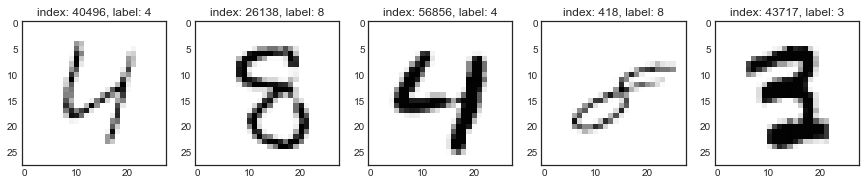

In [39]:
num_sample = 5
random_idx = np.random.randint(60000, size=num_sample)

plt.figure(figsize=(15,3))
for i, idx in enumerate(random_idx):
    img = x_train_full[idx, :]
    label = y_train_full[idx]

    plt.subplot(1, len(random_idx), i+1)
    plt.imshow(img)
    plt.title(f'index: {idx}, label: {label}')

In [40]:
# normalization
x_train = x_train/255.
x_val = x_val/255.
x_test = x_test/255.

y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

### 모델 구성(Sequential)

In [41]:
model = Sequential([
    Input(shape=(28, 28)),
    Flatten(input_shape=(28,28)),
    Dense(100, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(10, activation='softmax')
])

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_18 (Dense)            (None, 100)               78500     
                                                                 
 dense_19 (Dense)            (None, 64)                6464      
                                                                 
 dense_20 (Dense)            (None, 32)                2080      
                                                                 
 dense_21 (Dense)            (None, 10)                330       
                                                                 
Total params: 87,374
Trainable params: 87,374
Non-trainable params: 0
_________________________________________________________________


### 모델 컴파일 및 학습

In [42]:
# metrics custom
from sklearn.metrics import roc_auc_score

def auc_score(y_true, y_pred):
    auc_score = roc_auc_score(y_true, y_pred)
    return auc_score

In [43]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='sgd',
    metrics=[tf.keras.metrics.CategoricalAccuracy(), tf.keras.metrics.AUC()]
)

In [44]:
history = model.fit(x_train, y_train, epochs=50, batch_size=128, validation_data=(x_val, y_val))

Epoch 1/50
329/329 [==============================] - 3s 5ms/step - loss: 1.7198 - categorical_accuracy: 0.5275 - auc: 0.8581 - val_loss: 0.9676 - val_categorical_accuracy: 0.7706 - val_auc: 0.9659
Epoch 2/50
329/329 [==============================] - 2s 5ms/step - loss: 0.6761 - categorical_accuracy: 0.8254 - auc: 0.9794 - val_loss: 0.5317 - val_categorical_accuracy: 0.8493 - val_auc: 0.9851
Epoch 3/50
329/329 [==============================] - 2s 5ms/step - loss: 0.4527 - categorical_accuracy: 0.8745 - auc: 0.9879 - val_loss: 0.4035 - val_categorical_accuracy: 0.8846 - val_auc: 0.9895
Epoch 4/50
329/329 [==============================] - 1s 5ms/step - loss: 0.3811 - categorical_accuracy: 0.8922 - auc: 0.9901 - val_loss: 0.3923 - val_categorical_accuracy: 0.8818 - val_auc: 0.9892
Epoch 5/50
329/329 [==============================] - 2s 5ms/step - loss: 0.3432 - categorical_accuracy: 0.9017 - auc: 0.9914 - val_loss: 0.3367 - val_categorical_accuracy: 0.9026 - val_auc: 0.9914
Epoch 6/50

In [45]:
history.history.keys()

dict_keys(['loss', 'categorical_accuracy', 'auc', 'val_loss', 'val_categorical_accuracy', 'val_auc'])

In [46]:
history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

auc = history_dict['auc']
val_auc = history_dict['val_auc']

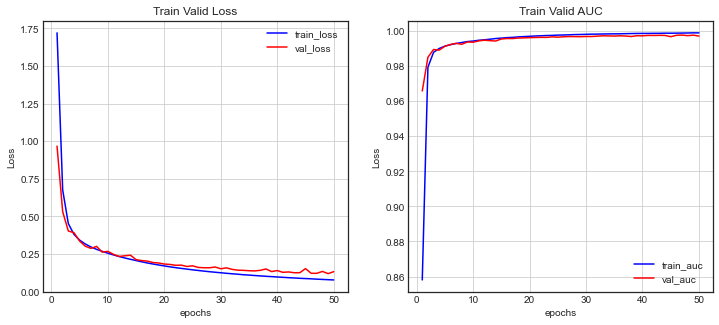

In [47]:
epochs = range(1, len(loss)+1)

fig = plt.figure(figsize=(12, 5))

ax1 = plt.subplot(1, 2, 1)
ax1.plot(epochs, loss, color='blue', label='train_loss')
ax1.plot(epochs, val_loss, color='red', label='val_loss')
ax1.set_title('Train Valid Loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

ax2 = plt.subplot(1, 2, 2)
ax2.plot(epochs, auc, color='blue', label='train_auc')
ax2.plot(epochs, val_auc, color='red', label='val_auc')
ax2.set_title('Train Valid AUC')
ax2.set_xlabel('epochs')
ax2.set_ylabel('Loss')
ax2.grid()
ax2.legend()

In [48]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.1237 - categorical_accuracy: 0.9633 - auc: 0.9979


[0.1236666589975357, 0.9632999897003174, 0.9978615045547485]

In [49]:
y_pred = model.predict(x_test)
y_pred.shape

313/313 [==============================] - 1s 2ms/step


(10000, 10)

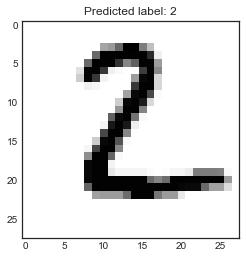

In [50]:
arg_pred_y = np.argmax(y_pred, axis=1)

plt.imshow(x_test[1])
plt.title(f'Predicted label: {arg_pred_y[1]}')
plt.show()

#### Confusion matrix

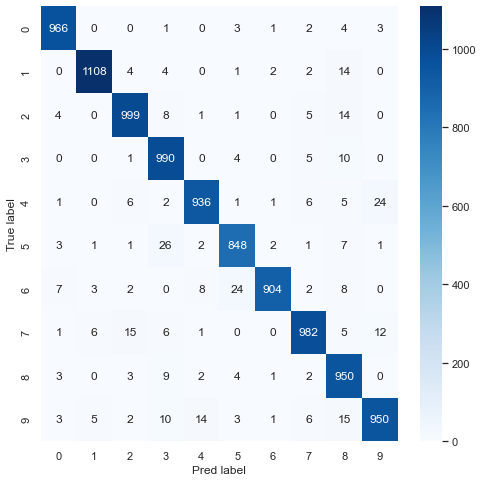

In [51]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

sns.set(style='white')
plt.figure(figsize=(8,8))
cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=-1))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Pred label')
plt.ylabel('True label')
plt.show()

- 분류 분석

In [52]:
print(classification_report(np.argmax(y_test, axis=-1), np.argmax(y_pred, axis=-1)))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.98      0.98      1135
           2       0.97      0.97      0.97      1032
           3       0.94      0.98      0.96      1010
           4       0.97      0.95      0.96       982
           5       0.95      0.95      0.95       892
           6       0.99      0.94      0.97       958
           7       0.97      0.96      0.96      1028
           8       0.92      0.98      0.95       974
           9       0.96      0.94      0.95      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000



In [54]:
class BaseLayer:
    def __init__(self, name=""):
        self.name = name

    def __repr__(self):
        return f"{self.name}Layer"

class ActivationLayer(BaseLayer):
    def __init__(self, size):
        super().__init__("Activation")
        self.size = size

class FCLayer(BaseLayer):
    def __init__(self, size):
        super().__init__("FullyConnected")
        self.size = size

In [55]:
print(FCLayer(42))

FullyConnectedLayer


### Callbacks
fit() 함수의 callbacks 매개변수 사용
- **ModelCheckpoint**
    - tf.keras.callbacks.ModelCheckpoint
    - 정기적으로 모델의 체크포인트를 저장하고, 문제가 발생할 때 복구하는데 사용
- **EarlyStopping**
    - tf.keras.callbacks.EarlyStopping
    - 검증 성능이 한동안 개선되지 않을 경우 학습을 중단할 때 사용
- **LearningRateScheduler**
    - tf.keras.callbacks.LearningRateScheduler
    - 최적화를 하는 동안 lr(학습률)을 동적으로 변경할 때 사용
- **TensorBoard**
    - tf.keras.callbacks.TensorBoard
    - 모델의 경과를 모니터링 할 때 사용

In [57]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, LearningRateScheduler, TensorBoard

In [59]:
model

In [60]:
# ModelCheckpoint

checkpoint_cb = ModelCheckpoint('keras_mnist_model.h5')
history = model.fit(x_train, y_train, epochs=10,
                    callbacks=[checkpoint_cb])

Epoch 1/10
1313/1313 [==============================] - 3s 3ms/step - loss: 0.0855 - categorical_accuracy: 0.9754 - auc: 0.9989
Epoch 2/10
1313/1313 [==============================] - 3s 3ms/step - loss: 0.0805 - categorical_accuracy: 0.9762 - auc: 0.9990
Epoch 3/10
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0741 - categorical_accuracy: 0.9784 - auc: 0.9990
Epoch 4/10
1313/1313 [==============================] - 3s 3ms/step - loss: 0.0691 - categorical_accuracy: 0.9802 - auc: 0.9991
Epoch 5/10
1313/1313 [==============================] - 3s 3ms/step - loss: 0.0646 - categorical_accuracy: 0.9813 - auc: 0.9992
Epoch 6/10
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0603 - categorical_accuracy: 0.9830 - auc: 0.9993
Epoch 7/10
1313/1313 [==============================] - 3s 3ms/step - loss: 0.0561 - categorical_accuracy: 0.9838 - auc: 0.9995
Epoch 8/10
1313/1313 [==============================] - 3s 3ms/step - loss: 0.0525 - categorical_accurac

In [62]:
# save the best model only

checkpoint_cb = ModelCheckpoint('keras_mnist_model.h5', save_best_only=True)
history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_val, y_val),
                    callbacks=[checkpoint_cb])

Epoch 1/10
1313/1313 [==============================] - 5s 3ms/step - loss: 0.0209 - categorical_accuracy: 0.9954 - auc: 0.9999 - val_loss: 0.1104 - val_categorical_accuracy: 0.9697 - val_auc: 0.9972
Epoch 2/10
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0195 - categorical_accuracy: 0.9961 - auc: 0.9999 - val_loss: 0.1104 - val_categorical_accuracy: 0.9692 - val_auc: 0.9972
Epoch 3/10
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0180 - categorical_accuracy: 0.9959 - auc: 0.9999 - val_loss: 0.1102 - val_categorical_accuracy: 0.9696 - val_auc: 0.9971
Epoch 4/10
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0168 - categorical_accuracy: 0.9965 - auc: 1.0000 - val_loss: 0.1086 - val_categorical_accuracy: 0.9701 - val_auc: 0.9971
Epoch 5/10
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0158 - categorical_accuracy: 0.9966 - auc: 1.0000 - val_loss: 0.1128 - val_categorical_accuracy: 0.9689 - val_auc: 0.9969


#### EarlyStopping
- 일정 patience 동안 검증 세트의 점수가 오르지 않으면 학습을 멈춤
- 모델이 향상되지 않으면 학습이 자동으로 중지되므로 epoch숫자를 크게 해도 괜찮음
- 학습이 끝난 후의 최상의 가중치를 복원하기 때문에 모델을 따로 복원할 필요 없음

In [63]:
checkpoint_cb = ModelCheckpoint('keras_mnist_model.h5', save_best_only=True)
earlystopping_cb = EarlyStopping(patience=3, monitor='val_loss',    # patience=3: 3번의 epoch 기회를 주고 monitor 대상 점수가 오르지 않으면 학습 멈춤
                                 restore_best_weights=True)
history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_val, y_val),
                    callbacks=[checkpoint_cb, earlystopping_cb])

Epoch 1/10
1313/1313 [==============================] - 5s 3ms/step - loss: 0.0098 - categorical_accuracy: 0.9986 - auc: 1.0000 - val_loss: 0.1140 - val_categorical_accuracy: 0.9701 - val_auc: 0.9969
Epoch 2/10
1313/1313 [==============================] - 5s 3ms/step - loss: 0.0092 - categorical_accuracy: 0.9988 - auc: 1.0000 - val_loss: 0.1165 - val_categorical_accuracy: 0.9701 - val_auc: 0.9968
Epoch 3/10
1313/1313 [==============================] - 5s 3ms/step - loss: 0.0083 - categorical_accuracy: 0.9991 - auc: 1.0000 - val_loss: 0.1159 - val_categorical_accuracy: 0.9703 - val_auc: 0.9966
Epoch 4/10
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0079 - categorical_accuracy: 0.9990 - auc: 1.0000 - val_loss: 0.1153 - val_categorical_accuracy: 0.9710 - val_auc: 0.9967


#### LearningRateScheduler
- 학습 중에 lr을 변경하기 위해 사용

In [64]:
def scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

In [73]:
round(model.optimizer.lr.numpy(), 5)

0.01

In [75]:
lr_scheduler_cb = LearningRateScheduler(scheduler)

history = model.fit(x_train, y_train, epochs=15,
                    callbacks=[lr_scheduler_cb], verbose=0)

round(model.optimizer.lr.numpy(), 5)

0.00607

#### Tensorboard
- 텐서보드를 사용해 학습과정 모니터링
- 텐서보드 사용을 위해서는 logs폴더를 만들고 학습이 진행되는 동안 로그파일 생성

In [76]:
log_dir = './logs'
tensorboard_cb = [TensorBoard(log_dir=log_dir, histogram_freq=1,
                              write_graph=True, write_images=True)]

model.fit(x_train, y_train, batch_size=32, validation_data=(x_val, y_val),
          epochs=30, callbacks=tensorboard_cb)

Epoch 1/30
1313/1313 [==============================] - 5s 4ms/step - loss: 0.0022 - categorical_accuracy: 1.0000 - auc: 1.0000 - val_loss: 0.1277 - val_categorical_accuracy: 0.9713 - val_auc: 0.9960
Epoch 2/30
1313/1313 [==============================] - 6s 4ms/step - loss: 0.0022 - categorical_accuracy: 1.0000 - auc: 1.0000 - val_loss: 0.1289 - val_categorical_accuracy: 0.9710 - val_auc: 0.9960
Epoch 3/30
1313/1313 [==============================] - 6s 4ms/step - loss: 0.0021 - categorical_accuracy: 1.0000 - auc: 1.0000 - val_loss: 0.1292 - val_categorical_accuracy: 0.9709 - val_auc: 0.9960
Epoch 4/30
1313/1313 [==============================] - 5s 4ms/step - loss: 0.0021 - categorical_accuracy: 1.0000 - auc: 1.0000 - val_loss: 0.1292 - val_categorical_accuracy: 0.9710 - val_auc: 0.9960
Epoch 5/30
1313/1313 [==============================] - 5s 3ms/step - loss: 0.0021 - categorical_accuracy: 1.0000 - auc: 1.0000 - val_loss: 0.1298 - val_categorical_accuracy: 0.9708 - val_auc: 0.9959


In [77]:
%load_ext tensorboard

In [78]:
%tensorboard --logdir {log_dir}

# 텐서보드 실행이 안되면 포트 번화 바꿔서 실행
# %tensorboard --logdir {log_dir} port 8000